# Programming Exercise 2: Logistic Regression
## Introduction
In this exercise, we will implement logistic regression and apply it to two different datasets. 

## 1 Logistic Regression
In this part of the exercise, we will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Our task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The code below will load the data and display it on a 2-dimensional plot by calling the function `plotData`. In the `Figure 1`, the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [1]:
# import libraries, and define helper functions
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

def head(matrix, n=5):
    if len(matrix) < n: return matrix
    else: return matrix[:n]
    
def padOnes(X):
    m = len(X) # number of observations
    ones = np.vstack(np.ones(m))
    return np.append(ones, X, axis=1)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0. 0. 0. 1. 1.]


Text(0, 0.5, 'Exam 2 score')

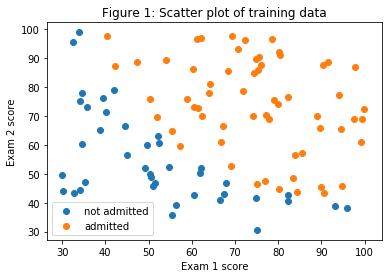

In [2]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
print(head(X))
print(head(y))

X1 = X[y==0]
X2 = X[y==1]

# plt.figure(dpi=90, figsize=(7, 5))
plt.scatter(X1[:, 0], X1[:, 1], label='not admitted')
plt.scatter(X2[:, 0], X2[:, 1], label='admitted')
plt.legend()

plt.title("Figure 1: Scatter plot of training data")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

## 1.2 Implementation
### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
$$h_\theta(x) = g(\theta^TX)$$

where function g is the sigmoid function. The sigmoid function is defined as:

$$g(z) = {1 \over 1 + e^{-z}}$$

The first step is to implement this function, `sigmoid`, so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

4.53978687024344e-05
0.5
0.9999546021312976


Text(0.5, 1.0, 'Sigmoid Function')

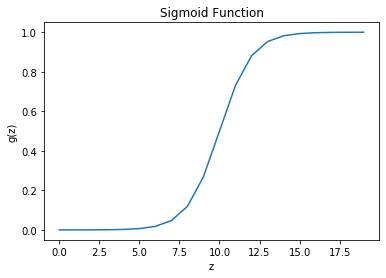

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(z)**-1)

print(sigmoid(-10))
print(sigmoid(0))
print(sigmoid(10))

plt.plot(sigmoid(range(-10, 10)))
plt.xlabel('z'); plt.ylabel('g(z)'); plt.title("Sigmoid Function")

### 1.2.2 Cost function and gradient
Now we will implement the cost function and gradient for logistic regression. The function `costFunction` returns the cost and gradient. Recall that the cost function in logistic regression is:

$$J(\theta) = {1 \over m} \sum_{i=1}^m [-y^i log(h_\theta(x^i)) - (1 - y^i) log(1 - h_\theta (x^i))]$$

and the gradient of the cost is a vector of the same length as θ where the $j^{th}$ element (for j = 0, 1, . . . , n) is defined as follows:

$${\partial J \over \partial \theta_j} = {1 \over m} \sum_{i=1}^m (h_\theta(x^i) - y^i) x_j^i$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).

We will call the `costFunction` using the initial parameters of θ. We should see that the cost is about 0.693.

In [4]:
def hypothesis(X, theta):
    return sigmoid(X.dot(theta))

def cost_lr(X, y, theta):
    hypo = hypothesis(X, theta)
    costs = -y * np.log(hypo) - (1 - y) * np.log(1 - hypo)
    return sum(costs) / len(y)

def gradient(X, y, theta):
    gradients = []
    m = len(y)
    hypo = hypothesis(X, theta)
    for j in range(len(theta)):
        g = (hypo - y).dot(X[:, j]) / m
        gradients.append(g)
    return gradients

def costFunction(X, y, theta):
    return cost_lr(X, y, theta), gradient(X, y, theta)

In [5]:
th0 = np.array([0, 0])

costFunction(X, y, th0)

(0.6931471805599458, [-12.009216589291155, -11.262842205513593])

In [6]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
ones = np.ones((m, 1))
paddedX = np.append(ones, X, axis=1)
print('First rows of X\n', head(paddedX), '\n')

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)
print('inital theta', initial_theta, '\n')

# Compute and display initial cost and gradient
cost, grad = costFunction(paddedX, y, initial_theta)
print('-'*80)
print('Cost at initial theta (zeros): %f\n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):')
print(' %s \n' % grad)
print('Expected gradients (approx):\n -0.1000 -12.0092 -11.2628\n')

# Compute and display cost and gradient with non-zero theta
test_theta = [-24, 0.2, 0.2]
cost, grad = costFunction(paddedX, y, test_theta)

print('-'*80)
print('\nCost at test theta: %f\n' % cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:')
print(' %s \n' % grad)
print('Expected gradients (approx):\n 0.043 2.566 2.647\n')

First rows of X
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]] 

inital theta [0. 0. 0.] 

--------------------------------------------------------------------------------
Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros):
 [-0.1, -12.009216589291155, -11.262842205513593] 

Expected gradients (approx):
 -0.1000 -12.0092 -11.2628

--------------------------------------------------------------------------------

Cost at test theta: 0.218330

Expected cost (approx): 0.218

Gradient at test theta:
 [0.04290299489953446, 2.5662341155107566, 2.6467973710824335] 

Expected gradients (approx):
 0.043 2.566 2.647



### 1.2.3 Learning parameters using fmin
In the previous assignment, we found the optimal parameters of a linear regression model by implementing gradent descent. we wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.

This time, instead of taking gradient descent steps, we will use a built-in function called fminunc. This is an optimization solver that finds the minimum of an **unconstrained function**. For logistic regression, we want to
optimize the cost function J(θ) with parameters θ.

Concretely, we are going to use fminunc to find the best parameters θ for the logistic regression cost function, given a fixed dataset (of X and y values). We will pass to fminunc the following inputs:
- The initial values of the parameters we are trying to optimize.
- A function that, when given the training set and a particular θ, computes the logistic regression cost and gradient with respect to θ for the dataset (X, y)

**Constraints** in optimization often refer to constraints on the parameters, for example, constraints that bound the possible values θ can take (e.g., θ ≤ 1). Logistic regression does not have such constraints since θ is allowed to take any real value.

To specify the actual function we are minimizing, we create a partial cost function to pass to the optimization function. `fmin` will converge on the right optimization parameters and return the final values of the cost and θ. Notice that by using `fmin`, we did not have to write any loops or set a learning rate like we did for gradient descent. This is all done by `fmin`: we only needed to provide a function calculating the cost and the gradient.

We will call your costFunction function using the optimal parameters of θ. We should see that the cost is about
0.203. This final θ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to Figure 2. 

In [7]:
# define cost as a partial function so that we can pass it to the optimization function
def pcost(X, y):
    def on(theta):
        hypo = hypothesis(X, theta)
        costs = -y * np.log(hypo) - (1 - y) * np.log(1 - hypo)
        return sum(costs) / len(y)
    return on

In [8]:
theta0 = np.zeros(n + 1)
ones = np.ones((m, 1))
paddedX = np.append(ones, X, axis=1)

pcost(paddedX, y)(theta0)

0.6931471805599458

In [9]:
theta = optimize.fmin(pcost(paddedX, y), theta0)
cost = cost_lr(paddedX, y, theta)
print(theta)
print(cost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]
0.2034977015902151


In [10]:
# Print theta to screen
print('Cost at theta found by fmin: %f\n' % cost)
print('Expected cost (approx): 0.203\n')
print('theta:')
print(' %s \n' % theta)
print('Expected theta (approx):')
print(' -25.161 0.206 0.201\n')

Cost at theta found by fmin: 0.203498

Expected cost (approx): 0.203

theta:
 [-25.16130062   0.20623142   0.20147143] 

Expected theta (approx):
 -25.161 0.206 0.201



In [11]:
def boundary_naive(X, theta, R=range(0, 100)):
    xs = []
    ys = []
    for j1 in R:
        for j2 in R:
            arr = np.array([1, j1, j2])
            prob = hypothesis(arr, theta)
            if prob > 0.45 and prob < 0.55:
                xs.append(j1)
                ys.append(j2)
    return xs, ys

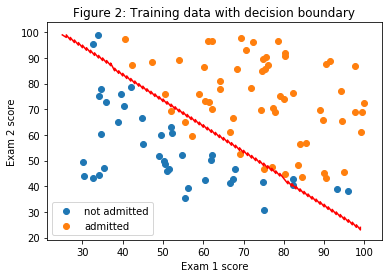

In [12]:
# plot decision boundary
xs, ys = boundary_naive(paddedX, theta)
plt.plot(xs, ys, 'r')

# plot data points
plt.scatter(X1[:, 0], X1[:, 1], label='not admitted')
plt.scatter(X2[:, 0], X2[:, 1], label='admitted')

# label and legends
plt.title("Figure 2: Training data with decision boundary")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()


### 1.2.4 Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, the we define a new function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.

We then will proceed to report the training accuracy of your classifier by computing the
percentage of examples it got correct.

In [13]:
def predict(theta, X):
    return (hypothesis(X, theta) > 0.5) + 0

predict(theta, paddedX)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [14]:
x1 = np.array([1, 45, 85])
prob = hypothesis(x1, theta);
print('For a student with scores 45 and 85, we predict an admission probability of: %f' % prob);
print('Expected value: 0.775 +/- 0.002\n');

# Compute accuracy on our training set
p = predict(theta, paddedX);

print('Train Accuracy: %f\n' % (np.mean(p == y) * 100));
print('Expected accuracy (approx): 89.0\n');

For a student with scores 45 and 85, we predict an admission probability of: 0.776292
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000

Expected accuracy (approx): 89.0



# 2 Regularized logistic regression
In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## 2.1 Visualizing the data
Similar to the previous parts of this exercise, `plotData` is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

In [15]:
data = np.genfromtxt('ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
print(head(X))
print(head(y))

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[1. 1. 1. 1. 1.]


In [16]:
def plotData(X, y):
    X1 = X[y==0]
    X2 = X[y==1]
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1])
    return plt

Text(0, 0.5, 'Microchip Test 2')

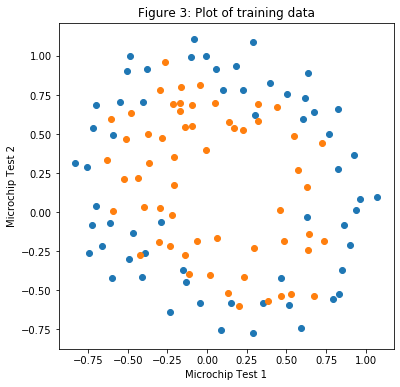

In [17]:
plt.figure(figsize=(6, 6))
plotData(X, y)
plt.title('Figure 3: Plot of training data')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. In the provided function `mapFeature`, we map the features into all polynomial terms of x1 and x2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [18]:
def mapFeature(X1, X2, degree=6):
    """
    MAPFEATURE Feature mapping function to polynomial features
        MAPFEATURE(X1, X2) maps the two input features
        to quadratic features used in the regularization exercise.

        Returns a new feature array with more features, comprising of 
        X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

        Inputs X1, X2 must be the same size
    """
    out = []
    for i in range(0, degree+1):
        for j in range(0, i+1):
            item = X1**(i-j) * X2**j
            out.append(item)
    return np.array(out).T


mapFeature(X[:, 0], X[:, 1]).shape

(118, 28)

## 2.3 Cost function and gradient
Now we will implement code to compute the cost function and gradient for regularized logistic regression. `costFunctionReg` returns the cost and gradient. Recall that the regularized cost function in logistic regression is:


$$J(\theta) = {1 \over m} \sum_{i=1}^m [-y^i log(h_\theta(x^i)) - (1 - y^i) log(1 - h_\theta (x^i))] + {\lambda \over 2m} \sum_{j=1}^n \theta_j^2$$

Note that you should not regularize the parameter $\theta_0$. The gradient of the cost function is a vector where the j
th element is defined as follows:

$${\partial J \over \partial \theta_j} = {1 \over m} \sum_{i=1}^m (h_\theta(x^i) - y^i) x_j^i \quad for \ j = 0$$

$${\partial J \over \partial \theta_j} = {1 \over m} \sum_{i=1}^m (h_\theta(x^i) - y^i) x_j^i + {\lambda \over m} \theta_j \quad for \ j \geq 1$$

We will call your costFunctionReg function using the initial value of θ (initialized to all zeros). We should see that the cost is about 0.693.

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta):
    return sigmoid(X.dot(theta))

def cost_lr_reg(X, y, theta, lam=1):
    m = len(y)
    hypo = hypothesis(X, theta)
    costs = -y * np.log(hypo) - (1 - y) * np.log(1 - hypo)
    
    penalties = 0.5 * lam * theta[1:]**2
    
    return (sum(costs) + sum(penalties)) / m

def gradient_reg(X, y, theta, lam=1):
    gradients = []
    m = len(y)
    hypo = hypothesis(X, theta)
    for j in range(len(theta)):
        g = (hypo - y).dot(X[:, j]) / m
        # adding the regularization penalty
        p = 0
        if j > 0: p = lam * theta[j] / m
        gradients.append(g + p)
    return gradients

def gradient_reg_vec(X, y, theta, lam=0):
    """Vectorized gradient function"""
    m = len(y)
    hypo = hypothesis(X, theta)
    gradients = X.T.dot(hypo - y) / m
    penalties = np.append(0, lam * theta[1:]) / m
    return gradients + penalties

def costFunctionReg(theta, X, y, lam):
    return cost_lr_reg(X, y, theta, lam), gradient_reg(X, y, theta, lam)

In [20]:
featX = mapFeature(X[:,0], X[:,1])

# Initialize fitting parameters
initial_theta = np.zeros(featX.shape[1])

# Set regularization parameter lambda to 1
lam = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, featX, y, lam)

print('Cost at initial theta (zeros): %f\n' % cost)
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:')
print(' %s \n' % grad[:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085 0.0188 0.0001 0.0503 0.0115\n')

print('-'*80);

# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones(featX.shape[1])
cost, grad = costFunctionReg(test_theta, featX, y, 10)

print('\nCost at test theta (with lambda = 10): %f\n' % cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:')
print(' %s \n' % grad[:5]);
print('Expected gradients (approx) - first five values only:')
print(' 0.3460 0.1614 0.1948 0.2269 0.0922\n')


Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:
 [0.00847457627118644, 0.01878809322033899, 7.777118644068013e-05, 0.05034463953635592, 0.011501330787338986] 

Expected gradients (approx) - first five values only:
 0.0085 0.0188 0.0001 0.0503 0.0115

--------------------------------------------------------------------------------

Cost at test theta (with lambda = 10): 3.206882

Expected cost (approx): 3.16

Gradient at test theta - first five values only:
 [0.3460450736792453, 0.16135191928091164, 0.19479575561199702, 0.22686278222504958, 0.0921856751032918] 

Expected gradients (approx) - first five values only:
 0.3460 0.1614 0.1948 0.2269 0.0922



### 2.3.1 Learning parameters using fmin
Similar to the previous parts, we will use `fmin` to learn the optimal parameters θ.

In [21]:
# define cost as a partial function so that we can pass it to the optimization function
def partial_cost_reg(X, y, lam=1):
    def on(theta):
        m = len(y)
        hypo = hypothesis(X, theta)
        costs = -y * np.log(hypo) - (1 - y) * np.log(1 - hypo) 
        penalties = 0.5 * lam * theta[1:]**2
        return (sum(costs) + sum(penalties)) / m
    return on

In [22]:
# Initialize fitting parameters
initial_theta = np.zeros(featX.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lam = 1;

pf = partial_cost_reg(featX, y, lam)

theta = optimize.fmin_bfgs(pf, initial_theta)
cost = cost_lr_reg(featX, y, theta, lam)
print(theta)
print(cost)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
[ 1.27268786  0.62557007  1.18096711 -2.0191986  -0.9176147  -1.43194246
  0.12375984 -0.36513193 -0.35703522 -0.17485724 -1.45843825 -0.05129709
 -0.61604035 -0.27464221 -1.19282646 -0.24270291 -0.20570112 -0.04499853
 -0.27782721 -0.29525901 -0.45613388 -1.04377892  0.02762821 -0.2926565
  0.01543377 -0.3275939  -0.14389211 -0.92460299]
0.5358660236423983


In [23]:
# Compute accuracy on our training set
p = predict(theta, featX);

print('Train Accuracy: %.3f\n' % (np.mean(p == y) * 100));
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n');

Train Accuracy: 83.051

Expected accuracy (with lambda = 1): 83.1 (approx)



## 2.4 Plotting the decision boundary
To help visualize the model learned by this classifier, we use the function `plotDecisionBoundary` which plots the (non-linear) decision boundary that separates the positive and negative examples. In
`plotDecisionBoundary`, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y = 0 to y = 1.

After learning the parameters θ, we plot decision boundary in Figure 4.

In [24]:
def generateBoundary(X1, X2, n=500, border=0.001):    
    space1 = np.linspace(np.min(X1), np.max(X1), n)
    space2 = np.linspace(np.min(X2), np.max(X2), n)
    xs = []
    ys = []
    for i in space1:
        for j in space2:
            x = mapFeature(i, j)
            hypo = hypothesis(x, theta)
            if hypo > (0.5 - border) and hypo < (0.5 + border): 
                xs.append(i)
                ys.append(j)
    return np.array(xs), np.array(ys)

'Figure 4'

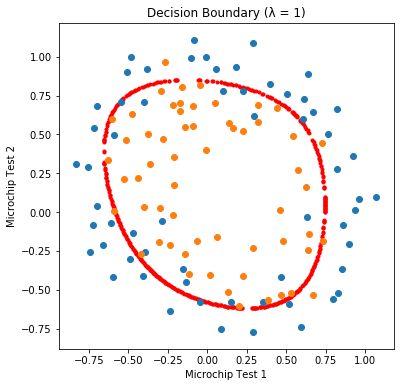

In [25]:
def plotWithBoundary(X, title):
    plt.figure(figsize=(6, 6))
    xs, ys = generateBoundary(X[:, 0], X[:, 1])
    plt.scatter(xs, ys, color='r', marker='.')
    #plt.plot(xs[ys>0], ys[ys>0], color='r')
    #plt.plot(xs[ys<=0], ys[ys<=0], color='r')
    plotData(X, y)
    plt.title('Decision Boundary (λ = %i)' % title)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    return plt

plotWithBoundary(X, 1)
"Figure 4"

## 2.5 Optional (ungraded) exercises
In this part of the exercise, we will try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary λ. With a small λ, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data
(Figure 5). This is not a good decision boundary: for example, it predicts that a point at x = (−0.25, 1.5) is accepted (y = 1), which seems to be an incorrect decision given the training set.

With a larger λ, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if λ is set to too high a value, you will not get a good fit and the decision
boundary will not follow the data so well, thus underfitting the data (Figure 6).

Optimization terminated successfully.
         Current function value: 0.305212
         Iterations: 223
         Function evaluations: 6720
         Gradient evaluations: 224


'Figure 5 -  Too little regularization (Overfitting)'

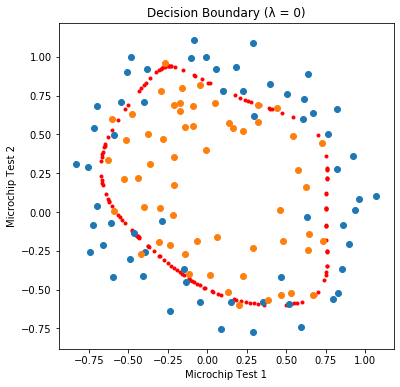

In [26]:
lam = 0.001;
pf = partial_cost_reg(featX, y, lam)
theta = optimize.fmin_bfgs(pf, initial_theta)
plotWithBoundary(X, lam)
"Figure 5 -  Too little regularization (Overfitting)"

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 660
         Gradient evaluations: 22


'Figure 6 - Too much regularization (Underfitting)'

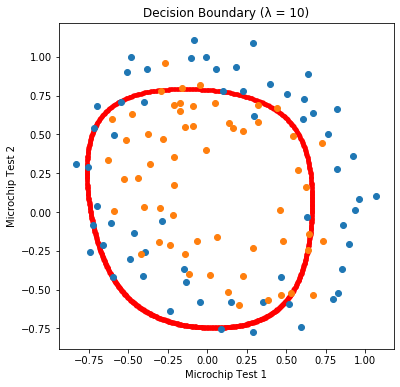

In [27]:
lam = 10;
pf = partial_cost_reg(featX, y, lam)
theta = optimize.fmin_bfgs(pf, initial_theta)
plotWithBoundary(X, lam)
"Figure 6 - Too much regularization (Underfitting)"